## Visualization of output data Feedin+_battery+

In [60]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.dates as mdates
import datetime
import pandas as pd
#% matplotlib inline
#np.set_printoptions(threshold=np.nan)
import time

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

### Read data from BEopt output and model results

In [61]:
Input_df = pd.read_csv("data/200124_datafile_all_details_right_timestamp.csv");

In [62]:
date="200530";
h_predict="8760";
h_control="8760";
h_start="1";
h_end="8760";
costfactor="1.0";
run="Feedin+_battery+_seco";

Results_df = pd.read_csv("results/"+ \
                         date+"_results_"+h_predict+"_"+h_control+"_"+h_start+"-"+h_end+"_"+run+"_"+ \
                         costfactor+".csv");

In [63]:
Results_df.tail() #show first 5 lines

,Temp_FH,Vol_HW,Soc_B,V_HW_plus,V_HW_minus,T_FH_plus,T_FH_minus,profits,COP_FH,COP_HW,...,PV_GR,PV_HP,GR_HP,B_HP,HP_FH,HP_HW,month,day,hour,horizon
8755,21.078155,168.774454,13.498380,0.0,0.0,0.0,0.0,-0.178151,3.235929,2.164500,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,31.0,19.0,8760.0
8756,20.519879,160.407230,13.497975,0.0,0.0,0.0,0.0,-1.048625,3.212857,2.141429,...,0.0,0.0,3.0,0.0,3.0,0.0,12.0,31.0,20.0,8760.0
8757,21.588660,159.736001,13.497570,0.0,0.0,0.0,0.0,-0.119211,3.207000,2.135571,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,31.0,21.0,8760.0
8758,20.849114,159.064771,13.497165,0.0,0.0,0.0,0.0,-0.104170,3.224571,2.153143,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,31.0,22.0,8760.0
8759,20.472623,158.393541,13.496760,0.0,0.0,0.0,0.0,-0.082885,3.232357,2.160929,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,31.0,23.0,8760.0


In [64]:
Results_df.shape

(8760, 24)

In [65]:
Input_df.sum()

heating           11704.250729
heating_fan         176.529919
hotwater           3018.414370
lights              611.407236
lgappl              994.430470
vent_fan             21.900000
misc               1469.891241
electkwh           3097.628947
heatingkwh        11880.780648
hotwaterkwh        3018.414370
PV_generation     16585.591000
Temperature       85657.602000
month             57168.000000
day              137712.000000
hour             100740.000000
dtype: float64

In [66]:
Results_df.sum()

Temp_FH       1.855296e+05
Vol_HW        8.461416e+05
Soc_B         6.485300e+04
V_HW_plus     0.000000e+00
V_HW_minus    0.000000e+00
T_FH_plus     7.397049e+01
T_FH_minus    5.029513e+00
profits       5.168469e+02
COP_FH        3.815492e+04
COP_HW        2.876926e+04
PV_DE         7.994546e+02
B_DE          1.935402e+03
GR_DE         3.627725e+02
PV_B          4.395500e+03
PV_GR         1.009650e+04
PV_HP         1.294140e+03
GR_HP         1.279903e+03
B_HP          2.029692e+03
HP_FH         3.455849e+03
HP_HW         1.147886e+03
month         5.716800e+04
day           1.377120e+05
hour          1.007400e+05
horizon       7.673760e+07
dtype: float64

In [67]:
# adapt Flows_df for comparison in rolling horizon case with T=96
# Results_df = Results_df.loc[:8760-96,:]

In [68]:
#Energy use
Results_df.sum()['PV_DE'] + Results_df.sum()['B_DE'] + Results_df.sum()['GR_DE'] + \
Results_df.sum()['HP_FH'] + Results_df.sum()['HP_HW']

7701.364353695484

In [69]:
# Self-consumption rate
1-(Results_df.sum()['PV_GR'] / Input_df.sum()['PV_generation'])

0.39124895949734184

In [70]:
# Self-sufficiency rate
1-((Results_df.sum()['GR_DE'] + Results_df.sum()['GR_HP']) / (Results_df.sum()['PV_DE'] + Results_df.sum()['B_DE'] + Results_df.sum()['GR_DE'] + Results_df.sum()['HP_FH'] + Results_df.sum()['HP_HW']))

0.7867033200912728

In [71]:
# Profits (set 0.1 to zero when no feed-in is allowed!)
0.1*Results_df.sum()['PV_GR']-0.3*(Results_df.sum()['GR_DE'] + Results_df.sum()['GR_HP'])

516.8469436369543

In [72]:
# Comfort violations
Results_df.loc[:,['V_HW_plus', 'V_HW_minus', 'T_FH_plus', 'T_FH_minus']].sum().sum()

78.99999999998704

In [73]:
# Yearly mean
Results_df.loc[:,:].mean()

Temp_FH         21.179176
Vol_HW          96.591503
Soc_B            7.403310
V_HW_plus        0.000000
V_HW_minus       0.000000
T_FH_plus        0.008444
T_FH_minus       0.000574
profits          0.059001
COP_FH           4.355585
COP_HW           3.284162
PV_DE            0.091262
B_DE             0.220936
GR_DE            0.041412
PV_B             0.501769
PV_GR            1.152568
PV_HP            0.147733
GR_HP            0.146108
B_HP             0.231700
HP_FH            0.394503
HP_HW            0.131037
month            6.526027
day             15.720548
hour            11.500000
horizon       8760.000000
dtype: float64

### Merge input and output data set

In [74]:
Data_df = pd.merge(Input_df, Results_df, on=['month', 'day','hour'], how='right');
Data_df.head()

,heating,heating_fan,hotwater,lights,lgappl,vent_fan,misc,electkwh,heatingkwh,hotwaterkwh,...,B_DE,GR_DE,PV_B,PV_GR,PV_HP,GR_HP,B_HP,HP_FH,HP_HW,horizon
0,3.736686,0.044709,0.0,0.022749,0.042381,0.0,0.176259,0.241389,3.781395,0.0,...,0.241389,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,8760.0
1,3.837678,0.035999,0.0,0.013649,0.041584,0.0,0.166187,0.221420,3.873677,0.0,...,0.221420,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,8760.0
2,6.059491,0.041142,0.0,0.009099,0.036289,0.0,0.161151,0.206539,6.100633,0.0,...,0.206539,0.0,0.0,0.0,0.0,0.000000e+00,0.179851,0.179851,0.000000,8760.0
3,2.423797,0.041142,0.0,0.009099,0.035492,0.0,0.156115,0.200706,2.464939,0.0,...,0.200706,0.0,0.0,0.0,0.0,0.000000e+00,1.233610,1.233610,0.000000,8760.0
4,1.211898,0.041142,0.0,0.010117,0.039192,0.0,0.161151,0.210460,1.253040,0.0,...,0.210460,0.0,0.0,0.0,0.0,1.387779e-17,0.087335,0.000000,0.087335,8760.0


In [75]:
Data_df.rename(columns={"electkwh": "d_e", "heatingkwh": "d_fh", "hotwaterkwh": "d_hw"}, inplace=True);

### Aggregate values per month and hour

In [76]:
Data_df_mean = Data_df.groupby(['month', 'hour'], as_index=False).mean()
Data_df_mean.drop("day", axis=1, inplace=True)

In [77]:
Data_df_mean.head()

,month,hour,heating,heating_fan,hotwater,lights,lgappl,vent_fan,misc,d_e,...,B_DE,GR_DE,PV_B,PV_GR,PV_HP,GR_HP,B_HP,HP_FH,HP_HW,horizon
0,1,0,4.152013,0.041146,0.256580,0.022749,0.064627,0.0,0.176259,0.263635,...,0.210523,0.053112,0.0,0.0,0.0,0.639770,0.384700,0.924227,0.100244,8760.0
1,1,1,4.391493,0.040976,0.030513,0.013649,0.047451,0.0,0.166187,0.227287,...,0.185707,0.041580,0.0,0.0,0.0,0.730484,0.514061,1.244545,0.000000,8760.0
2,1,2,4.188169,0.041142,0.025315,0.009099,0.036289,0.0,0.161151,0.206539,...,0.166564,0.039975,0.0,0.0,0.0,0.675484,1.055752,1.637574,0.093663,8760.0
3,1,3,4.577854,0.041142,0.065320,0.009099,0.035492,0.0,0.156115,0.200706,...,0.155385,0.045321,0.0,0.0,0.0,0.741515,0.574100,1.218841,0.096774,8760.0
4,1,4,4.362378,0.041253,0.000000,0.010117,0.039464,0.0,0.161151,0.210732,...,0.163209,0.047523,0.0,0.0,0.0,0.634167,0.756059,1.387408,0.002817,8760.0


In [78]:
Data_df_mean.shape

(288, 35)

In [79]:
# add season by month
Data_df_mean['season'] = ((Data_df_mean['month'] % 12 + 3) // 3).map({1:4, 2: 1, 3:2, 4:3})

Data_df_mean_season = Data_df_mean.groupby(['season', 'hour'], as_index=False).mean()
Data_df_mean_season.drop("month", axis=1, inplace=True)

### Plot: Demand all combined

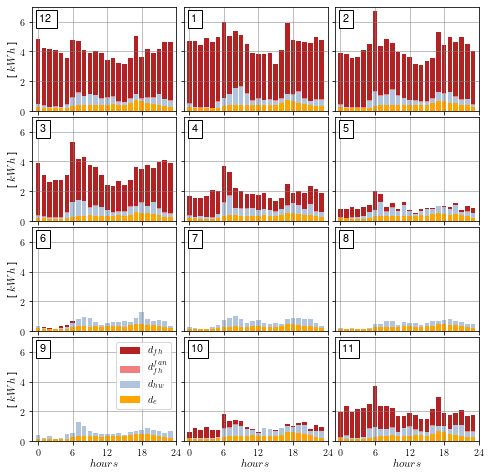

In [80]:
x_axis = np.arange(0,24,1);
fig = pl.subplots(figsize=(8,8));  
pl.subplots_adjust(hspace=0.05, wspace=0.05);

# Plots very first upper left
pl.subplot(4,3,1)

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['d_e'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating_fan'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater'][:], # + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating_suppl'][:], 
       label=' $d_{fh}$ ', color="firebrick");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['d_e'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating_fan'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater'][:], 
       label=' $d_{fh}^{fan}$ ', color= "lightcoral");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['d_e'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater'][:], #+ Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater_suppl'][:], 
       label=' $d_{hw}$ ', color= "lightsteelblue");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['d_e'][:], #+ Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater_suppl'][:], 
       label=' $d_e$ ', color= "orange");

#pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['heating'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating_suppl'][:], 
#       label='heating_suppl', color= "tomato");

pl.annotate("12",xy=(.4, 6), fontsize=11, bbox={'facecolor':'white'});
#pl.title('Heating demand by month', fontsize=13, x=1.6);
pl.ylim(0, 7); pl.xlim(-1, 24);
pl.xticks(np.arange(0,25,6)); 
pl.ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
ax=pl.gca();
ax.axes.xaxis.set_ticklabels([]);
ax.grid(color='grey', linestyle='-', linewidth=0.5);

# Plots others in loop
for i in np.arange(2,13):
    pl.subplot(4,3,i)
    
    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['d_e'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating_fan'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater'][:], # + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating_suppl'][:], 
           label=' $d_{fh}$ ', color="firebrick");

    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['d_e'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating_fan'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater'][:],
       label=' $d_{fh}^{fan}$ ', color= "lightcoral");
    
    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['d_e'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater'][:], #+ Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater_suppl'][:], 
       label=' $d_{hw}$ ', color= "lightsteelblue");

   # pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating_suppl'][:], 
   #    label='heating_suppl', color= "tomato");
    
    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['d_e'][:], #+ Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater_suppl'][:], 
       label=' $d_{e}$ ', color= "orange");

    
    pl.annotate(i-1,xy=(.4, 6), fontsize=11, bbox={'facecolor':'white'});
    pl.ylim(0, 7); pl.xlim(-1, 24);
    pl.xticks(np.arange(0,25,6)); 
    pl.ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
    pl.xlabel('$hours$', fontsize=11, labelpad=1);
    ax=pl.gca();
    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    if not i in [1,4,7,10]:
        ax.axes.yaxis.set_ticklabels([]);
        pl.ylabel(None);
        
    if not i in np.arange(10,13):
        ax.axes.xaxis.set_ticklabels([]);
        pl.xlabel(None);
    
    if i == 12:
        ax.legend(bbox_to_anchor=(-1.1, 1));

#pl.savefig('../latex/pics/OverallDemand.svg', bbox_inches='tight');
#pl.savefig('../latex/pics/OverallDemand.pgf', bbox_inches='tight');
#pl.savefig('pics/OverallDemand.pdf', bbox_inches='tight');

### Plot: Seasonal PV flows and battery load

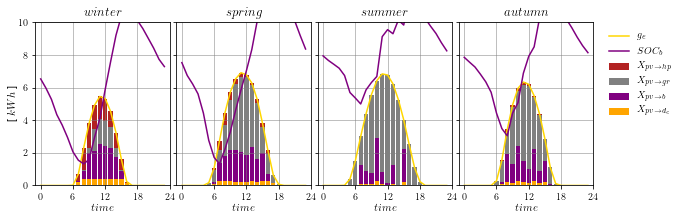

In [81]:
# by season (short)
x_axis = np.arange(0,24,1);
fig = pl.subplots(figsize=(10,3));
pl.subplots_adjust(hspace=0.1, wspace=0.05);

seasons = ['$spring$', '$summer$','$autumn$', '$winter$'];

# Plots very first upper left
pl.subplot(1,4,1)

pl.bar(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_HP'][:] 
               + Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_GR'][:] 
               + Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_B'][:]
               + Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_DE'][:], 
       label='$PV$→$$HP$', color= "firebrick");

pl.bar(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_GR'][:] 
               + Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_B'][:]
               + Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_DE'][:], 
       label='$PV$→$GR$', color= "grey");

pl.bar(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_B'][:]
               + Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_DE'][:],
       label='$PV$→$B$', color="purple");

pl.bar(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_DE'][:],
       label='$PV$→$D_e$', color="orange");

pl.plot(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['PV_generation'][:],
       label='$G_e$', color="gold");

pl.plot(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == 4]['Soc_B'][:],
       label='$SOC_B$', color="purple");

pl.title(seasons[3], fontsize=13);
pl.ylim(0, 10); pl.xlim(-1, 24);
pl.xticks(np.arange(0,25,6)); 
pl.ylabel('[ $kWh$ ]', fontsize=11, labelpad=1);
pl.xlabel('$time$', fontsize=11, labelpad=1);
ax=pl.gca();
ax.grid(color='grey', linestyle='-', linewidth=0.5);

# Plots others in loop
for i in np.arange(1,4):
    pl.subplot(1,4,i+1)

    pl.bar(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_HP'][:] 
               + Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_GR'][:] 
               + Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_B'][:]
               + Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_DE'][:], 
       label='$X_{pv \\rightarrow hp}$', color= "firebrick");

    pl.bar(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_GR'][:] 
                   + Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_B'][:]
                   + Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_DE'][:], 
           label='$X_{pv \\rightarrow gr}$', color= "grey");

    pl.bar(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_B'][:]
                   + Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_DE'][:],
           label='$X_{pv \\rightarrow b}$', color="purple");

    pl.bar(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_DE'][:],
           label='$X_{pv \\rightarrow d_e}$', color="orange");

    pl.plot(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['PV_generation'][:],
           label='$g_e$', color="gold");

    pl.plot(x_axis, Data_df_mean_season.loc[Data_df_mean_season['season'] == i]['Soc_B'][:],
           label='$SOC_b$', color="purple");

    #pl.annotate(i,xy=(1.3,11), fontsize=11, bbox={'facecolor':'white'});
    pl.ylim(0, 10); pl.xlim(-1, 24);
    pl.xticks(np.arange(0,25,6)); 
    pl.xlabel('$time$', fontsize=11, labelpad=1);
    pl.title(seasons[i-1], fontsize=13);
    ax=pl.gca();
    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    pl.ylabel(None); ax.axes.yaxis.set_ticklabels([]);
        
    if i == 3:
        ax.legend(bbox_to_anchor=(1.05, 1),frameon=False);
        
#pl.savefig('pics/PV_Flows_season.svg', bbox_inches='tight');
#pl.savefig('pics/PV_Flows_season.pgf', bbox_inches='tight');
#pl.savefig('pics/PV_Flows_season.pdf', bbox_inches='tight');

### Determine target states of charge for storage systems

In [82]:
# Find max value FH but only if substantial charging occured in the previous time period
Data_df_max_FH = Data_df.loc[(Data_df['HP_FH'].shift(1) > 0.01)].groupby(['month', 'day'], as_index=False).max()   #find heating periods, find max of day
Data_df_max_FH.drop(['heating',  'heating_fan', 'hotwater', 'lights','lgappl', 'vent_fan', 'misc', 'PV_generation', 
                  'Temperature', 'hour', 'PV_DE', 'B_DE', 'GR_DE',  'PV_GR', 'PV_HP','GR_HP', 'B_HP', 'COP_HW', 'COP_FH'], 
                 axis=1, inplace=True)

In [83]:
# Find max value FH but only if substantial charging occured in the previous time period
Data_df_max_HW = Data_df.loc[(Data_df['HP_HW'].shift(1) > 0.01)].groupby(['month', 'day'], as_index=False).max()   #find heating periods, find max of day
Data_df_max_HW.drop(['heating',  'heating_fan', 'hotwater', 'lights','lgappl', 'vent_fan', 'misc', 'PV_generation', 
                  'Temperature', 'hour', 'PV_DE', 'B_DE', 'GR_DE',  'PV_GR', 'PV_HP','GR_HP', 'B_HP', 'COP_HW', 'COP_FH'], 
                 axis=1, inplace=True)

In [84]:
# Find max value FH but only if substantial charging occured in the previous time period
Data_df_max_B = Data_df.loc[(Data_df['PV_B'].shift(1) > 0.01)].groupby(['month', 'day'], as_index=False).max()   #find heating periods, find max of day
Data_df_max_B.drop(['heating',  'heating_fan', 'hotwater', 'lights','lgappl', 'vent_fan', 'misc', 'PV_generation', 
                  'Temperature', 'hour', 'PV_DE', 'B_DE', 'GR_DE',  'PV_GR', 'PV_HP','GR_HP', 'B_HP', 'COP_HW', 'COP_FH'], 
                 axis=1, inplace=True)

In [85]:
Data_df_max_FH.head(5)

,month,day,d_e,d_fh,d_hw,Temp_FH,Vol_HW,Soc_B,V_HW_plus,V_HW_minus,T_FH_plus,T_FH_minus,profits,PV_B,HP_FH,HP_HW,horizon
0,1,1,0.557523,4.888735,3.355036,22.0,179.328770,13.499595,0.0,0.0,0.0,0.0,0.387000,3.3,2.955727,2.222872,8760.0
1,1,2,0.839243,4.282786,5.228504,22.0,179.328770,13.500000,0.0,0.0,0.0,0.0,0.181426,3.3,1.509311,3.000000,8760.0
2,1,3,0.705264,6.100633,2.675710,22.0,171.803556,8.408986,0.0,0.0,0.0,0.0,0.000000,0.0,3.000000,3.000000,8760.0
3,1,4,0.878512,7.309103,4.099964,22.0,171.899860,0.706369,0.0,0.0,0.0,0.0,0.000000,0.0,3.000000,3.000000,8760.0
4,1,5,0.833640,7.312532,0.672726,22.0,118.302598,13.500000,0.0,0.0,0.0,0.0,0.082147,3.3,3.000000,3.000000,8760.0


In [86]:
# select only SOC target days when charging happened that day
Data_df_max_select_FH_short = Data_df_max_FH.pivot(index='day', columns='month', values= 'Temp_FH');
Data_df_max_select_HW = Data_df_max_HW.pivot(index='day', columns='month', values= 'Vol_HW');
Data_df_max_select_B = Data_df_max_B.pivot(index='day', columns='month', values= 'Soc_B');

In [87]:
Data_df_max_select_FH_short.head() #August is missing!

month,1,2,3,4,5,6,7,9,10,11,12
day,,,,,,,,,,,
1,22.0,22.0,22.0,22.0,22.0,21.571851,NaN,NaN,NaN,20.667923,22.0
2,22.0,22.0,22.0,22.0,22.0,22.000000,NaN,NaN,21.685752,22.000000,22.0
3,22.0,22.0,22.0,22.0,22.0,22.000000,NaN,NaN,22.000000,22.000000,22.0
4,22.0,22.0,22.0,22.0,22.0,22.000000,NaN,NaN,22.000000,22.000000,22.0
5,22.0,22.0,22.0,22.0,22.0,NaN,NaN,NaN,21.714388,21.134919,22.0


In [88]:
# add August
Data_df_max_select_FH_np = np.empty((31,12));
Data_df_max_select_FH_np[:] = np.nan;
Data_df_max_select_FH = pd.DataFrame(Data_df_max_select_FH_np, index=np.arange(1,32), columns=np.arange(1,13));
Data_df_max_select_FH.loc[:,:7] = Data_df_max_select_FH_short.loc[:,:7];
Data_df_max_select_FH.loc[:,8:] = Data_df_max_select_FH_short.loc[:,8:];
Data_df_max_select_FH.head()

,1,2,3,4,5,6,7,8,9,10,11,12
1,22.0,22.0,22.0,22.0,22.0,21.571851,NaN,NaN,NaN,NaN,20.667923,22.0
2,22.0,22.0,22.0,22.0,22.0,22.000000,NaN,NaN,NaN,21.685752,22.000000,22.0
3,22.0,22.0,22.0,22.0,22.0,22.000000,NaN,NaN,NaN,22.000000,22.000000,22.0
4,22.0,22.0,22.0,22.0,22.0,22.000000,NaN,NaN,NaN,22.000000,22.000000,22.0
5,22.0,22.0,22.0,22.0,22.0,NaN,NaN,NaN,NaN,21.714388,21.134919,22.0


In [89]:
#Data_df_max_select_B_quant = np.empty((3,12));
#Data_df_max_select_HW_quant = np.empty((3,12));
#Data_df_max_select_FH_quant = np.empty((3,12));

# determine quantiles
Data_df_max_select_B_quant = Data_df_max_select_B.quantile(q=[0.25, 0.5, 0.75], axis=0)
Data_df_max_select_HW_quant = Data_df_max_select_HW.quantile(q=[0.25, 0.5, 0.75], axis=0)
Data_df_max_select_FH_quant = Data_df_max_select_FH.quantile(q=[0.25, 0.5, 0.75], axis=0)

In [90]:
Data_df_max_select_FH_quant

,1,2,3,4,5,6,7,8,9,10,11,12
0.25,22.0,22.0,22.0,22.0,21.531578,22.0,20.1705,NaN,21.99767,21.516179,21.72104,22.0
0.50,22.0,22.0,22.0,22.0,22.000000,22.0,20.1705,NaN,22.00000,21.999022,22.00000,22.0
0.75,22.0,22.0,22.0,22.0,22.000000,22.0,20.1705,NaN,22.00000,22.000000,22.00000,22.0


### Plot: SoC target values

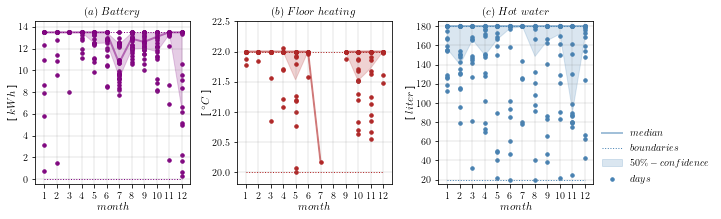

In [91]:
x_axis = np.ones((31,12))*np.arange(1,13,1);

label=[0.25, 0.5, 0.75]
fig = pl.subplots(figsize=(10,3));
pl.subplots_adjust(wspace=0.3);

pl.subplot(1,3,1)###########################################################################################################
pl.fill_between(x_axis[0], Data_df_max_select_B_quant.loc[label[2]], Data_df_max_select_B_quant.loc[label[0]], label='$75\% quantile$', color='purple', alpha=0.2);
pl.scatter(x_axis, Data_df_max_select_B, color = 'purple', s=12); 
pl.plot(x_axis[0], Data_df_max_select_B_quant.loc[label[1]], label= '$Median$', color = 'purple', alpha=0.5, linewidth='2');
pl.plot(x_axis[0], np.ones(12)*13.5, color="purple", linestyle='dotted', linewidth=1);
pl.plot(x_axis[0], np.ones(12)*0, color="purple", linestyle='dotted', linewidth=1);

pl.ylabel('[ $kWh$ ]', fontsize=11, labelpad=1);
pl.title('$(a)~Battery$', fontsize=11); 
pl.xticks(np.arange(1,13,1)); 
pl.ylim(-0.5, 14.5); pl.yticks(np.arange(0,14.1,2)); 
pl.xlabel('$month$', fontsize=11, labelpad=1);    
ax=pl.gca(); ax.grid(color='grey', linestyle='-', linewidth=0.2);

pl.subplot(1,3,2) #FH not defined in August, arrays too short ####################################################################
pl.fill_between(x_axis[0], Data_df_max_select_FH_quant.loc[label[2]], Data_df_max_select_FH_quant.loc[label[0]], color='firebrick', alpha=0.2);
pl.scatter(x_axis, Data_df_max_select_FH, label='FH SoC targets', color = 'firebrick', s=12);
pl.plot(x_axis[0], Data_df_max_select_FH_quant.loc[label[1]], label= label[1], color = 'firebrick', alpha=0.5, linewidth='2');
pl.plot(x_axis[0], np.ones(12)*22, color="firebrick", linestyle='dotted', linewidth=1);
pl.plot(x_axis[0], np.ones(12)*20, color="firebrick", linestyle='dotted', linewidth=1);

pl.xticks(np.arange(1,13,1));  
pl.ylim(19.8, 22.5); pl.yticks(np.arange(20,22.6,0.5));
pl.title('$(b)~Floor~heating$', fontsize=11);
pl.ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=1);
pl.xlabel('$month$', fontsize=11, labelpad=1);    
ax=pl.gca(); ax.grid(color='grey', linestyle='-', linewidth=0.2);


pl.subplot(1,3,3)##################################################################################################################
pl.fill_between(x_axis[0], Data_df_max_select_HW_quant.loc[label[2]], Data_df_max_select_HW_quant.loc[label[0]], label='$50\%-confidence$', color='steelblue', alpha=0.2);
pl.scatter(x_axis, Data_df_max_select_HW, color = 'steelblue', s=12, label = '$days$');
pl.plot(x_axis[0], Data_df_max_select_HW_quant.loc[label[1]], label= '$median$', color = 'steelblue', alpha=0.5, linewidth='2');
pl.plot(x_axis[0], np.ones(12)*180, color="steelblue", linestyle='dotted', linewidth=1, label = '$boundaries$');
pl.plot(x_axis[0], np.ones(12)*20, color="steelblue", linestyle='dotted', linewidth=1);

pl.title('$(c)~Hot~water$', fontsize=11);
pl.ylabel('[ $liter$ ]', fontsize=11, labelpad=1);
pl.xticks(np.arange(1,13,1));  
pl.ylim(15, 185); pl.yticks(np.arange(20,180.1,20)); 
pl.xlabel('$month$', fontsize=11, labelpad=1);    
ax=pl.gca(); ax.grid(color='grey', linestyle='-', linewidth=0.2);
pl.legend(bbox_to_anchor=(1, 0.4), facecolor='white', frameon=False); #position right with latex font

#pl.savefig('pics/SoC_targets.svg', bbox_inches='tight');
#pl.savefig('pics/SoC_targets.pgf', bbox_inches='tight');
#pl.savefig('pics/SoC_targets.pdf', bbox_inches='tight');

### Determine COPs of floor heating and hot water

In [92]:
Data_df_mean_HW_quant = Data_df_mean.pivot(index='hour', columns='month', values='COP_HW').quantile(q=[0.25, 0.5, 0.75], axis=0);
Data_df_mean_FH_quant = Data_df_mean.pivot(index='hour', columns='month', values='COP_FH').quantile(q=[0.25, 0.5, 0.75], axis=0);

In [93]:
Data_df_mean_FH_quant

month,1,2,3,4,5,6,7,8,9,10,11,12
0.25,3.258679,2.944758,3.543832,4.058399,4.532291,4.808455,5.068196,5.067909,4.964364,4.433048,4.106049,3.869084
0.50,3.340306,3.020170,3.670105,4.169162,4.639637,4.906918,5.168977,5.188298,5.057555,4.524941,4.173438,3.907380
0.75,3.402259,3.136204,3.861565,4.419738,4.843025,5.108442,5.368441,5.402211,5.279749,4.702336,4.304984,3.964051


In [94]:
Data_df_mean.pivot(index='hour', columns='month', values='COP_FH').head()

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,3.276433,2.969194,3.548366,4.047040,4.512668,4.785062,5.043594,5.052353,4.970455,4.437251,4.125007,3.888608
1,3.261161,2.948755,3.530228,4.029574,4.497412,4.770302,5.019853,5.029691,4.946090,4.420440,4.111048,3.878560
2,3.251230,2.932768,3.513965,4.014200,4.486431,4.754000,4.999645,5.008802,4.922093,4.404846,4.091052,3.869657
3,3.244002,2.921610,3.501493,4.000560,4.475500,4.739443,4.985537,4.990615,4.901581,4.392537,4.069574,3.862809
4,3.235675,2.908849,3.487442,3.984888,4.468977,4.735105,4.979942,4.976253,4.887383,4.383329,4.051317,3.858037


### Plot: COPs of floor heating and hot water

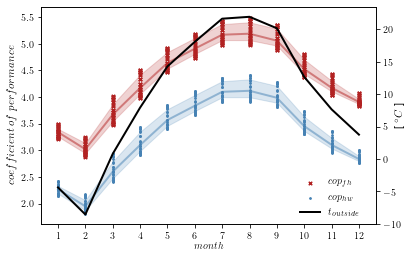

In [95]:
label=[0.25, 0.5, 0.75];

x_axis = np.ones((24,12))*np.arange(1,13,1);
fig, ax1 = pl.subplots()

ax1.set_xlabel('$month$', labelpad=1)
pl.xticks(np.arange(1,13,1)); 
#COP_FH
ax1.fill_between(x_axis[0], Data_df_mean_FH_quant.loc[label[2]], Data_df_mean_FH_quant.loc[label[0]], color='firebrick', alpha=0.2);
ax1.scatter(x_axis, Data_df_mean.pivot(index='hour', columns='month', values='COP_FH'), label= '$cop_{fh}$', color = 'firebrick', s=12, marker='x');
ax1.plot(x_axis[0], Data_df_mean_FH_quant.loc[label[1]], color = 'firebrick', alpha=0.5, linewidth='2');
#COP_HW
ax1.fill_between(x_axis[0], Data_df_mean_HW_quant.loc[label[2]], Data_df_mean_HW_quant.loc[label[0]], color='steelblue', alpha=0.2);
ax1.scatter(x_axis, Data_df_mean.pivot(index='hour', columns='month', values='COP_HW'), label= '$cop_{hw}$', color = 'steelblue', s=12, marker='.');
ax1.plot(x_axis[0], Data_df_mean_HW_quant.loc[label[1]], color = 'steelblue', alpha=0.5, linewidth='2');
ax1.set_ylabel('$coefficient~of~performance$', fontsize=11)  # we already handled the x-label with ax1

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=-6)  # we already handled the x-label with ax1
ax2.plot(x_axis[0], Data_df_mean.groupby(['month'], as_index=False).mean()['Temperature'][:], label= '$t_{outside}$', color = 'black', linewidth='2');
fig.legend(bbox_to_anchor=(0.85, 0.31), frameon=False); #position right after latex font

#pl.savefig('pics/COPs.svg', bbox_inches='tight');
#pl.savefig('pics/COPs.pgf', bbox_inches='tight');
#pl.savefig('pics/COPs.pdf', bbox_inches='tight');

### Plot: Pareto-graph of the costfactor specification

In [96]:
costfactors = [0.01, 0.1, 1, 10, 100, 1000];
violations = [3077.33, 312.5, 78.67, 78.66, 78.66, 78.66];
profits = [678.23, 612.77, 570.11, 570.05, 569.96, 570.10];

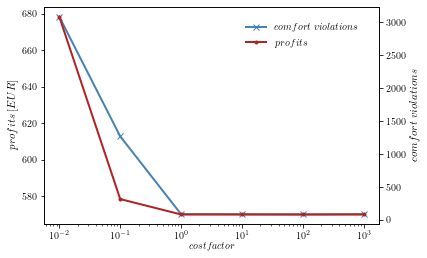

In [97]:
fig, ax1 = pl.subplots()
pl.xscale('log');
ax1.set_xlabel('$costfactor$', labelpad=1)
ax1.plot(costfactors, profits, marker='x', color = 'steelblue', label='$comfort~violations$', linewidth='2');
ax1.set_ylabel('$profits~[EUR]$', fontsize=11)
ax2 = ax1.twinx()
ax2.plot(costfactors, violations, marker='.', color = 'firebrick', label='$profits$', linewidth='2');
ax2.set_ylabel('$comfort~violations$', fontsize=11) 
fig.legend(bbox_to_anchor=(0.85, 0.85), frameon=False); #position right after latex font

#pl.savefig('pics/costfactors.svg', bbox_inches='tight');
#pl.savefig('pics/costfactors.pgf', bbox_inches='tight');
#pl.savefig('pics/costfactors.pdf', bbox_inches='tight');

### Plot: Demand fullfillment by month

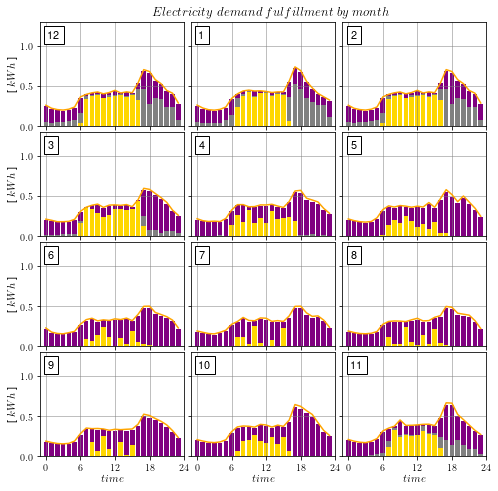

In [98]:
x_axis = np.arange(0,24,1);
fig = pl.subplots(figsize=(8,8));
pl.subplots_adjust(hspace=0.05, wspace=0.05);

# Plots very first upper left
pl.subplot(4,3,1)

pl.bar(x_axis, 0.95*Data_df_mean.loc[Data_df_mean['month'] == 2]['B_DE'][:] +  #correct for efficiency factor
       Data_df_mean.loc[Data_df_mean['month'] == 2]['GR_DE'][:] + Data_df_mean.loc[Data_df_mean['month'] == 2]['PV_DE'][:],
       label='B→DE', color= "purple");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 2]['GR_DE'][:] +
       Data_df_mean.loc[Data_df_mean['month'] == 2]['PV_DE'][:], 
       label='GR→DE', color= "grey");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 2]['PV_DE'][:], label='PV', color="gold");

pl.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 2]['d_e'][:],
       label='$D_E$', color="orange");

pl.annotate("12",xy=(.4, 1.1), fontsize=11, bbox={'facecolor':'white'});
pl.title('$Electricity~demand~fulfillment~by~month$', fontsize=13, x=1.6);
pl.ylim(0, 1.3); pl.xlim(-1, 24);
pl.xticks(np.arange(0,25,6)); 
pl.ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
ax=pl.gca();
ax.axes.xaxis.set_ticklabels([]);
ax.grid(color='grey', linestyle='-', linewidth=0.5);

# Plots others in loop
for i in np.arange(2,13):
    pl.subplot(4,3,i)

    pl.bar(x_axis, 0.95*Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['B_DE'][:] +  #correct for efficiency factor
           Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['GR_DE'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['PV_DE'][:],
           label='$B$→$D_E$', color= "purple");

    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['GR_DE'][:] +
           Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['PV_DE'][:], 
           label='$GR$→$D_E$', color= "grey");

    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['PV_DE'][:], label='$PV$', color="gold");
    
    pl.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['d_e'][:],
       label='$D_E$', color="orange");
    
    pl.annotate(i-1,xy=(.4, 1.1), fontsize=11, bbox={'facecolor':'white'});
    pl.ylim(0, 1.3); pl.xlim(-1, 24);
    pl.xticks(np.arange(0,25,6)); 
    pl.ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
    pl.xlabel('$time$', fontsize=11, labelpad=1);
    ax=pl.gca();
    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    if not i in [1,4,7,10]:
        ax.axes.yaxis.set_ticklabels([]);
        pl.ylabel(None);
        
    if not i in np.arange(10,13):
        ax.axes.xaxis.set_ticklabels([]);
        pl.xlabel(None);
    

#pl.savefig('pics/DE_Fullfillment.svg', bbox_inches='tight');
#pl.savefig('pics/DE_Fullfillment.pgf', bbox_inches='tight');
#pl.savefig('pics/DE_Fullfillment.pdf', bbox_inches='tight');

### Determine daily sums per month

In [99]:
Data_df_sum = Data_df.groupby(['month', 'day'], as_index=False).sum()
Data_df_sum = Data_df_sum[['month', 'day', 'd_e', 'd_fh', 'd_hw', 'PV_generation',
       'PV_DE', 'B_DE', 'GR_DE', 'PV_B', 'PV_GR','PV_HP','GR_HP', 'B_HP']]

In [100]:
Data_df_sum.head()

,month,day,d_e,d_fh,d_hw,PV_generation,PV_DE,B_DE,GR_DE,PV_B,PV_GR,PV_HP,GR_HP,B_HP
0,1,1,9.497780,69.155109,18.965282,48.158,2.982228,4.748127,1.767425,16.209717,2.057905e+01,8.387004,1.020347,15.087197
1,1,2,9.771863,70.058989,16.268147,40.366,3.746784,2.955375,3.069704,14.212282,6.145456e+00,16.261478,5.928560,6.632160
2,1,3,9.721459,77.337005,13.784442,2.504,1.844354,3.095608,4.781497,0.000000,0.000000e+00,0.659646,18.349576,7.440736
3,1,4,10.246336,89.452734,15.879958,5.932,3.642415,0.670910,5.933011,0.403031,1.110223e-16,1.886554,35.545062,0.000000
4,1,5,9.723519,118.541539,5.760357,35.165,3.699633,0.654601,5.369285,14.211444,2.111428e+00,15.142495,22.799761,8.822987


### Determine self-consumption

In [101]:
Data_df_sum['Cons_GR'] = (Data_df_sum['PV_GR'][:]/Data_df_sum['PV_generation'][:])*100
Data_df_sum['Cons_DE'] = (Data_df_sum['PV_DE'][:]/Data_df_sum['PV_generation'][:])*100
Data_df_sum['Cons_HP'] = (Data_df_sum['PV_HP'][:]/Data_df_sum['PV_generation'][:])*100
Data_df_sum['Cons_B'] = (Data_df_sum['PV_B'][:]/Data_df_sum['PV_generation'][:])*100

In [102]:
Data_df_sum_cons_pivot_GR = Data_df_sum[['Cons_GR', 'month','day']].pivot(index='day', columns='month', values= 'Cons_GR');
Data_df_sum_cons_pivot_DE = Data_df_sum[['Cons_DE', 'month','day']].pivot(index='day', columns='month', values= 'Cons_DE');
Data_df_sum_cons_pivot_HP = Data_df_sum[['Cons_HP', 'month','day']].pivot(index='day', columns='month', values= 'Cons_HP');
Data_df_sum_cons_pivot_B = Data_df_sum[['Cons_B', 'month','day']].pivot(index='day', columns='month', values= 'Cons_B');

100-Data_df_sum_cons_pivot_GR.max(axis=0)

month
1     56.484400
2     46.539435
3     27.444448
4     17.981993
5     14.487297
6     11.515383
7     11.532840
8     10.659372
9     12.741662
10    16.793363
11    19.214461
12    54.147804
dtype: float64

In [103]:
100-Data_df_sum_cons_pivot_GR.mean()

month
1     87.328651
2     81.949824
3     60.010241
4     46.198505
5     31.851095
6     21.396460
7     19.137138
8     18.770857
9     22.682378
10    41.965140
11    60.026544
12    91.396521
dtype: float64

In [104]:
Data_df_sum_select_cons_DE = np.empty((3,12));
Data_df_sum_select_cons_HP = np.empty((3,12));
Data_df_sum_select_cons_B = np.empty((3,12));

# determine quantiles
Data_df_sum_select_cons_DE = Data_df_sum_cons_pivot_DE.quantile(q=[0.25, 0.5, 0.75])
Data_df_sum_select_cons_HP = Data_df_sum_cons_pivot_HP.quantile(q=[0.25, 0.5, 0.75])
Data_df_sum_select_cons_B = Data_df_sum_cons_pivot_B.quantile(q=[0.25, 0.5, 0.75])

### Determine self-sufficiency

In [105]:
Data_df_sum['Autarky_DE'] = (1 - (Data_df_sum['GR_DE'][:]/Data_df_sum['d_e'][:]))*100
Data_df_sum['Autarky_HP'] = (1 - (Data_df_sum['GR_HP'][:]/(Data_df_sum['GR_HP'][:] + Data_df_sum['PV_HP'][:] + Data_df_sum['B_HP'][:])))*100
Data_df_sum['Autarky_all'] = (1 - ((Data_df_sum['GR_HP'][:] + Data_df_sum['GR_DE'][:]) / (Data_df_sum['GR_HP'][:] + Data_df_sum['PV_HP'][:] + Data_df_sum['B_HP'][:] + Data_df_sum['d_e'][:])))*100

In [106]:
Data_df_sum_autarky_pivot_DE = Data_df_sum[['Autarky_DE', 'month','day']].pivot(index='day', columns='month', values= 'Autarky_DE');
Data_df_sum_autarky_pivot_HP = Data_df_sum[['Autarky_HP', 'month','day']].pivot(index='day', columns='month', values= 'Autarky_HP');
Data_df_sum_autarky_pivot_all = Data_df_sum[['Autarky_all', 'month','day']].pivot(index='day', columns='month', values= 'Autarky_all');

Data_df_sum_autarky_pivot_all.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,91.798820,28.226183,74.708444,92.366407,100.0,100.0,100.0,100.0,100.0,100.0,100.0,81.321767
2,76.684848,65.926424,74.410763,94.975150,100.0,100.0,100.0,100.0,100.0,100.0,100.0,24.886190
3,36.051516,28.996398,34.568324,99.428304,100.0,100.0,100.0,100.0,100.0,100.0,100.0,83.727453
4,13.003660,31.216647,89.883283,98.445291,100.0,100.0,100.0,100.0,100.0,100.0,100.0,92.549228
5,50.133362,79.948994,86.789067,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,72.374825


In [107]:
Data_df_sum_select_autark_DE = np.empty((3,12));
Data_df_sum_select_autark_HP = np.empty((3,12));
Data_df_sum_select_autark_all = np.empty((3,12));

# determine quantiles
Data_df_sum_select_autark_DE = Data_df_sum_autarky_pivot_DE.quantile(q=[0.25, 0.5, 0.75])
Data_df_sum_select_autark_HP = Data_df_sum_autarky_pivot_HP.quantile(q=[0.25, 0.5, 0.75])
Data_df_sum_select_autark_all = Data_df_sum_autarky_pivot_all.quantile(q=[0.25, 0.5, 0.75])

In [108]:
Data_df_sum_select_autark_all.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
0.25,49.533001,62.403777,93.215854,100.0,100.0,100.0,100.0,100.0,100.0,100.0,70.315325,38.713539
0.50,61.527768,74.195250,98.667599,100.0,100.0,100.0,100.0,100.0,100.0,100.0,93.940473,51.794925
0.75,77.314487,83.778689,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,70.625853


In [109]:
Data_df_sum_autarky_pivot_all.mean()

month
1      60.878543
2      69.585252
3      93.516924
4      99.507172
5     100.000000
6     100.000000
7     100.000000
8     100.000000
9     100.000000
10    100.000000
11     83.044737
12     52.857468
dtype: float64

In [110]:
Data_df_sum_select_autark_HP.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
0.25,48.647338,60.319115,95.236667,100.0,100.0,100.0,100.0,100.0,100.0,100.0,78.460809,35.634440
0.50,55.395125,73.013446,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,46.989573
0.75,78.746638,86.768171,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,73.282732


### Plot: Self-sufficiency

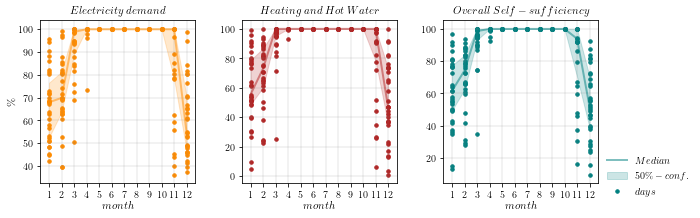

In [111]:
x_axis = np.ones((31,12))*np.arange(1,13,1);

label=[0.25, 0.5, 0.75]
fig = pl.subplots(figsize=(10,3));
pl.subplots_adjust(wspace=0.3);

pl.subplot(1,3,1)
pl.fill_between(x_axis[0], Data_df_sum_select_autark_DE.loc[label[2]], Data_df_sum_select_autark_DE.loc[label[0]], color='darkorange', alpha=0.2, label='$50\%-conf.$');
pl.scatter(x_axis, Data_df_sum_autarky_pivot_DE,  color = 'darkorange', s=12); 
pl.plot(x_axis[0], Data_df_sum_select_autark_DE.loc[label[1]], label= '$Median$', color = 'darkorange', alpha=0.5, linewidth='2');

pl.ylabel('$\%$', fontsize=11, labelpad=1);
pl.title('$Electricity~demand$', fontsize=11); 
pl.xticks(np.arange(1,13,1));  
pl.xlabel('$month$', fontsize=11, labelpad=1);    
ax=pl.gca(); ax.grid(color='grey', linestyle='-', linewidth=0.2);

pl.subplot(1,3,2)
pl.fill_between(x_axis[0], Data_df_sum_select_autark_HP.loc[label[2]], Data_df_sum_select_autark_HP.loc[label[0]], color='firebrick', alpha=0.2, label='$50\%-conf.$');
pl.scatter(x_axis, Data_df_sum_autarky_pivot_HP,  color = 'firebrick', s=12); 
pl.plot(x_axis[0], Data_df_sum_select_autark_HP.loc[label[1]], label= '$Median$', color = 'firebrick', alpha=0.5, linewidth='2');

pl.title('$Heating~and~Hot~Water$', fontsize=11); 
pl.xticks(np.arange(1,13,1));  
pl.xlabel('$month$', fontsize=11, labelpad=1);    
ax=pl.gca(); ax.grid(color='grey', linestyle='-', linewidth=0.2);

pl.subplot(1,3,3)
pl.fill_between(x_axis[0], Data_df_sum_select_autark_all.loc[label[2]], Data_df_sum_select_autark_all.loc[label[0]], color='teal', alpha=0.2, label='$50\%-conf.$');
pl.scatter(x_axis, Data_df_sum_autarky_pivot_all,  label = '$days$', color = 'teal', s=12); 
pl.plot(x_axis[0], Data_df_sum_select_autark_all.loc[label[1]], label= '$Median$', color = 'teal', alpha=0.5, linewidth='2');

pl.title('$Overall~Self-sufficiency$', fontsize=11); 
pl.xticks(np.arange(1,13,1));  
pl.xlabel('$month$', fontsize=11, labelpad=1);    
ax=pl.gca(); ax.grid(color='grey', linestyle='-', linewidth=0.2);
pl.legend(bbox_to_anchor=(1, 0.225), facecolor='white', frameon=False); #position right with latex font

#pl.savefig('../latex/pics/'+ run +'Self-sufficiency.svg', bbox_inches='tight');
#pl.savefig('../latex/pics/'+ run +'Self-sufficiency.pgf', bbox_inches='tight');

### Plot: Self-consumption

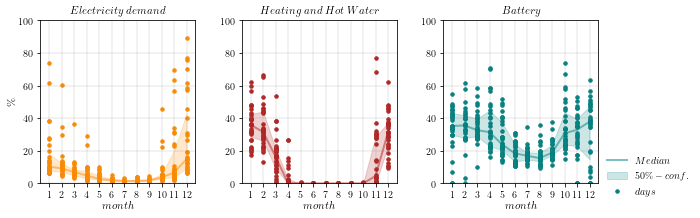

In [112]:
x_axis = np.ones((31,12))*np.arange(1,13,1);

label=[0.25, 0.5, 0.75]
fig = pl.subplots(figsize=(10,3));
pl.subplots_adjust(wspace=0.3);

pl.subplot(1,3,1)
pl.fill_between(x_axis[0], Data_df_sum_select_cons_DE.loc[label[2]], Data_df_sum_select_cons_DE.loc[label[0]], color='darkorange', alpha=0.2, label='$50\%-conf.$');
pl.scatter(x_axis, Data_df_sum_cons_pivot_DE,  color = 'darkorange', s=12); 
pl.plot(x_axis[0], Data_df_sum_select_cons_DE.loc[label[1]], label= '$Median$', color = 'darkorange', alpha=0.5, linewidth='2');

pl.ylim(0, 100); pl.yticks(np.arange(0,101,20)); 
pl.ylabel('$\%$', fontsize=11, labelpad=1);
pl.title('$Electricity~demand$', fontsize=11); 
pl.xticks(np.arange(1,13,1));  
pl.xlabel('$month$', fontsize=11, labelpad=1);    
ax=pl.gca(); ax.grid(color='grey', linestyle='-', linewidth=0.2);

pl.subplot(1,3,2)
pl.fill_between(x_axis[0], Data_df_sum_select_cons_HP.loc[label[2]], Data_df_sum_select_cons_HP.loc[label[0]], color='firebrick', alpha=0.2, label='$50\%-conf.$');
pl.scatter(x_axis, Data_df_sum_cons_pivot_HP,  color = 'firebrick', s=12); 
pl.plot(x_axis[0], Data_df_sum_select_cons_HP.loc[label[1]], label= '$Median$', color = 'firebrick', alpha=0.5, linewidth='2');

pl.ylim(0, 100); pl.yticks(np.arange(0,101,20)); 
pl.title('$Heating~and~Hot~Water$', fontsize=11); 
pl.xticks(np.arange(1,13,1));  
pl.xlabel('$month$', fontsize=11, labelpad=1);    
ax=pl.gca(); ax.grid(color='grey', linestyle='-', linewidth=0.2);

pl.subplot(1,3,3)
pl.fill_between(x_axis[0], Data_df_sum_select_cons_B.loc[label[2]], Data_df_sum_select_cons_B.loc[label[0]], color='teal', alpha=0.2, label='$50\%-conf.$');
pl.scatter(x_axis, Data_df_sum_cons_pivot_B,  label = '$days$', color = 'teal', s=12); 
pl.plot(x_axis[0], Data_df_sum_select_cons_B.loc[label[1]], label= '$Median$', color = 'teal', alpha=0.5, linewidth='2');

pl.ylim(0, 100); pl.yticks(np.arange(0,101,20)); 
pl.title('$Battery$', fontsize=11); 
pl.xticks(np.arange(1,13,1));  
pl.xlabel('$month$', fontsize=11, labelpad=1);    
ax=pl.gca(); ax.grid(color='grey', linestyle='-', linewidth=0.2);
pl.legend(bbox_to_anchor=(1, 0.225), facecolor='white', frameon=False); #position right with latex font

#pl.savefig('../latex/pics/'+ run +'Self-consumption.svg', bbox_inches='tight');
#pl.savefig('../latex/pics/'+ run +'Self-consumption.pgf', bbox_inches='tight');

### Plot: Example days winter

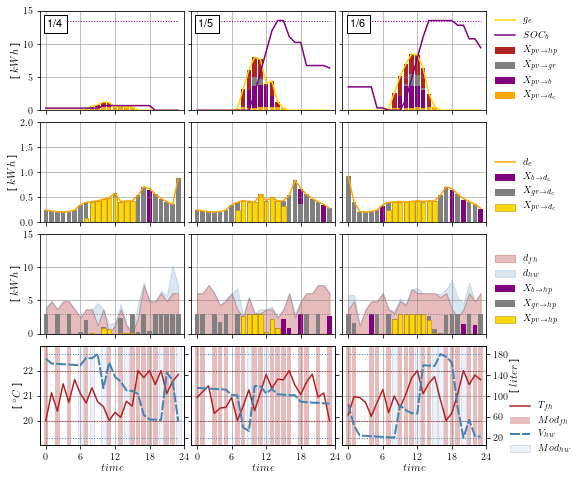

In [113]:
x_axis = np.arange(0,24,1);
fig = pl.figure(figsize=(8,8));
pl.subplots_adjust(hspace=0.12, wspace=0.05);
month=1;
day=4;

# Plots PV flows 01/06-01/08
for i in np.arange(1,4):
    ax1=fig.add_subplot(4,3,0+i);
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_HP'] 
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_GR'] 
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_B']
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'], 
               label='$X_{pv \\rightarrow hp}$', color= "firebrick");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_GR'] 
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_B']
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'], 
                   label='$X_{pv \\rightarrow gr}$', color= "grey");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_B']
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'],
                   label='$X_{pv \\rightarrow b}$', color="purple");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'],
                   label='$X_{pv \\rightarrow d_e}$', color="orange");
    
    ax1.plot(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_generation'],
                   label='$g_e$', color="gold");
    
    ax1.plot(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'Soc_B'],
                   label='$SOC_b$', color="purple");
    
    ax1.plot(x_axis, np.ones(24)*13.5, color="purple", linestyle='dotted', linewidth=1);
    
    ax1.annotate(str(month)+'/'+str(day+i-1),xy=(.4,12.6), fontsize=11, bbox={'facecolor':'white'});
    ax1.set_xticks(np.arange(0,25,6)); 
    #ax2.set_yticks(np.arange(-10,31,10));
    #ax2.set_yticklabels(np.arange(-10,31,10));  
    ax1.set_ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
    #ax2.set_ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=1);    
    #ax1.set_xlabel('[ $hours$ ]', fontsize=11, labelpad=1);
    ax1.grid(color='grey', linestyle='-', linewidth=0.5);
    ax1.set_ylim([0, 15]);  ax1.set_xlim([-1, 24]); #ax2.set_ylim([-15, 30]); ax1.set_xlim([-1, 24]);
    
    if not i ==1:
        ax1.axes.yaxis.set_ticklabels([]);
        ax1.set_ylabel(None);
    

    ax1.axes.xaxis.set_ticklabels([]);
    ax1.set_xlabel(None);
        
    if i == 3:
        ax1.legend(bbox_to_anchor=(1, 0), loc='lower left', frameon=False);
    '''    
    if i ==1:
        pl.title('Example days from Winter season', fontsize=13, x=1.6);'''

# Plots demand fulfillment
for i in np.arange(1,4):
    ax1=fig.add_subplot(4,3,3+i);
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.bar(x_axis, 0.95*Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'B_DE'] 
                   + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'GR_DE'] 
                   + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'], 
                   label='$X_{b \\rightarrow d_e}$', color= "purple");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'GR_DE']
                   + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'],
                    label='$X_{gr \\rightarrow d_e}$', color="grey");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'],
                    label='$X_{pv \\rightarrow d_e}$', color="gold", edgecolor="darkgoldenrod", linewidth= 0.5);
    
    ax1.plot(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'd_e'],
                    label='$d_e$', color="orange");
    
    #ax1.annotate(i-1,xy=(.4, 1.1), fontsize=11, bbox={'facecolor':'white'});
    ax1.set_xticks(np.arange(0,25,6)); 
    #ax2.set_yticks(np.arange(0,1.3,0.5));
    #ax2.set_yticklabels(np.arange(-10,31,10));  
    ax1.set_ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
    #ax2.set_ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=1);    
    ax1.set_xlabel('[ $time$ ]', fontsize=11, labelpad=1);
    ax1.grid(color='grey', linestyle='-', linewidth=0.5);
    ax1.set_ylim([0, 2]); ax1.set_xlim([-1, 24]);# ax2.set_ylim([-15, 30]); 
    
    if not i ==1:
        ax1.axes.yaxis.set_ticklabels([]);
        ax1.set_ylabel(None);
    

    ax1.axes.xaxis.set_ticklabels([]);
    ax1.set_xlabel(None);

        
    if i == 3:
        ax1.legend(bbox_to_anchor=(1, 0), loc='lower left', frameon=False);
        
# Plots HP fulfillment
for i in np.arange(1,4):
    ax1=fig.add_subplot(4,3,6+i);
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.fill_between(x_axis, np.zeros(24), Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'd_fh'], 
                     color='firebrick', alpha=0.3, label='$d_{fh}$');
    
    ax1.fill_between(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'd_fh'], 
                    Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'd_hw']
                    + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'd_fh'], 
                    color='steelblue', alpha=0.2, label='$d_{hw}$', edgecolor="navy", linewidth= 1);
    
    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'B_HP'] 
                    + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'GR_HP'] 
                    + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_HP'],
                    label='$X_{b \\rightarrow hp}$', color="purple");
    
    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'GR_HP'] 
                    + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_HP'],
                    label='$X_{gr \\rightarrow hp}$', color="grey");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_HP'],
                    label='$X_{pv \\rightarrow hp}$', color="gold", edgecolor="darkgoldenrod", linewidth= 0.5);
    
    ax1.plot(x_axis, np.ones(24)*3, color="gray", linestyle='dotted', linewidth=1);
    
    #ax1.annotate(i-1,xy=(.4, 1.1), fontsize=11, bbox={'facecolor':'white'});
    ax1.set_xticks(np.arange(0,25,6)); 
    #ax2.set_yticks(np.arange(0,1.3,0.5));
    #ax2.set_yticklabels(np.arange(-10,31,10));  
    ax1.set_ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
    #ax2.set_ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=1);    
    ax1.set_xlabel('[ $time$ ]', fontsize=11, labelpad=1);
    ax1.grid(color='grey', linestyle='-', linewidth=0.5);
    ax1.set_ylim([0, 15]); ax1.set_xlim([-1, 24]);# ax2.set_ylim([-15, 30]); 
    
    if not i ==1:
        ax1.axes.yaxis.set_ticklabels([]);
        ax1.set_ylabel(None);
    

    ax1.axes.xaxis.set_ticklabels([]);
    ax1.set_xlabel(None);

    
    if i == 3:
        ax1.legend(bbox_to_anchor=(1, 0), loc='lower left', frameon=False);

        
# Plots COPs Heating
for i in np.arange(1,4):
    ax1=fig.add_subplot(4,3,9+i);
    ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.bar(x_axis,  (Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'HP_FH']>0.001)*23, 
                     color='firebrick', alpha=0.3, label='$Mod_{fh}$');
    
    ax1.plot(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'Temp_FH'],
                    label='$T_{fh}$', color="firebrick");
    
    ax3.bar(x_axis,  (Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'HP_HW']>0.001)*200, 
                     color='steelblue', alpha=0.1, label='$Mod_{hw}$', edgecolor="navy", linewidth= 1);
    
    ax3.plot(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'Vol_HW'],
                    label='$V_{hw}$', color="steelblue", linestyle= (0, (5, 1)), linewidth=2);
    
    ax1.plot(x_axis, np.ones(24)*20, color="firebrick", linestyle='dotted', linewidth=1);
    ax1.plot(x_axis, np.ones(24)*22, color="firebrick", linestyle='dotted', linewidth=1);
    ax3.plot(x_axis, np.ones(24)*20, color="steelblue", linestyle='dotted', linewidth=1);
    ax3.plot(x_axis, np.ones(24)*180, color="steelblue", linestyle='dotted', linewidth=1);
    
    #ax1.annotate(i-1,xy=(.4, 1.1), fontsize=11, bbox={'facecolor':'white'});

    ax1.set_xticks(np.arange(0,25,6)); 
    ax1.set_yticks(np.arange(20,23,1));
    #ax1.set_yticklabels(np.arange(20,23,1));
    ax1.set_ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=1);
    ax1.set_xlabel('$time$', fontsize=11, labelpad=1);
    ax1.grid(color='grey', linestyle='-', linewidth=0.5);
    ax1.set_ylim([19, 23]); ax1.set_xlim([-1, 24]); 
    
    ax3.set_ylim([5, 196]);    
    ax3.set_yticks(np.arange(20,181,40));
    ax3.set_ylabel('[ $Liter$ ]', fontsize=11, labelpad=1);    
    
    if not i ==1:
        ax1.axes.yaxis.set_ticklabels([]);
        ax1.set_ylabel(None);

    if i == 3:
        ax1.legend(bbox_to_anchor=(1.1, 0.1), loc='lower left', frameon=False); ax3.legend(bbox_to_anchor=(1.1, -0.18), loc='lower left', frameon=False);  #adapted to TeX
        ax3.set_ylabel('[ $liter$ ]', fontsize=11, position=(1,0.7)); 
        
#pl.savefig('pics/ExampledaysWinter.svg', bbox_inches='tight');
#pl.savefig('pics/ExampledaysWinter.pgf', bbox_inches='tight');
#pl.savefig('pics/ExampledaysWinter.pdf', bbox_inches='tight');

### Plot: Example days summer

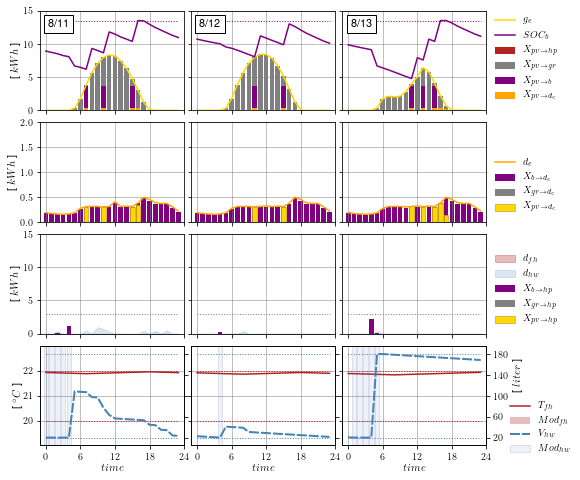

In [114]:
month=8;
day=11;
length=3;

x_axis = np.arange(0,24,1);
fig = pl.figure(figsize=((length/3)*8,8));
pl.subplots_adjust(hspace=0.12, wspace=0.05);


for i in np.arange(1,length+1):
    #plots PV flows
    ax1=fig.add_subplot(4,length,0+i);
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_HP'] 
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_GR'] 
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_B']
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'], 
               label='$X_{pv \\rightarrow hp}$', color= "firebrick");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_GR'] 
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_B']
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'], 
                   label='$X_{pv \\rightarrow gr}$', color= "grey");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_B']
               + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'],
                   label='$X_{pv \\rightarrow b}$', color="purple");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'],
                   label='$X_{pv \\rightarrow d_e}$', color="orange");
    
    ax1.plot(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_generation'],
                   label='$g_e$', color="gold");
    
    ax1.plot(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'Soc_B'],
                   label='$SOC_b$', color="purple");
    
    ax1.plot(x_axis, np.ones(24)*13.5, color="purple", linestyle='dotted', linewidth=1);
    
    ax1.annotate(str(month)+'/'+str(day+i-1),xy=(.4,12.6), fontsize=11, bbox={'facecolor':'white'});
    ax1.set_xticks(np.arange(0,25,6)); 
    #ax2.set_yticks(np.arange(-10,31,10));
    #ax2.set_yticklabels(np.arange(-10,31,10));  
    ax1.set_ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
    #ax2.set_ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=1);    
    #ax1.set_xlabel('[ $hours$ ]', fontsize=11, labelpad=1);
    ax1.grid(color='grey', linestyle='-', linewidth=0.5);
    ax1.set_ylim([0, 15]);  ax1.set_xlim([-1, 24]); #ax2.set_ylim([-15, 30]); ax1.set_xlim([-1, 24]);
    
    if not i ==1:
        ax1.axes.yaxis.set_ticklabels([]);
        ax1.set_ylabel(None);
    

    ax1.axes.xaxis.set_ticklabels([]);
    ax1.set_xlabel(None);
        
    if i == length:
        ax1.legend(bbox_to_anchor=(1, 0), loc='lower left', frameon=False);
    '''    
    if i ==1:
        pl.title('Example days from Summer season', fontsize=13, x=1.6);'''

# Plots demand fulfillment
for i in np.arange(1,length+1):
    ax1=fig.add_subplot(4,length,length+i);
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.bar(x_axis, 0.95*Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'B_DE'] 
                   + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'GR_DE'] 
                   + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'], 
                   label='$X_{b \\rightarrow d_e}$', color= "purple");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'GR_DE']
                   + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'],
                    label='$X_{gr \\rightarrow d_e}$', color="grey");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_DE'],
                    label='$X_{pv \\rightarrow d_e}$', color="gold", edgecolor="darkgoldenrod", linewidth= 0.5);
    
    ax1.plot(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'd_e'],
                    label='$d_e$', color="orange");
    
    #ax1.annotate(i-1,xy=(.4, 1.1), fontsize=11, bbox={'facecolor':'white'});
    ax1.set_xticks(np.arange(0,25,6)); 
    #ax2.set_yticks(np.arange(0,1.3,0.5));
    #ax2.set_yticklabels(np.arange(-10,31,10));  
    ax1.set_ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
    #ax2.set_ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=1);    
    ax1.set_xlabel('[ $time$ ]', fontsize=11, labelpad=1);
    ax1.grid(color='grey', linestyle='-', linewidth=0.5);
    ax1.set_ylim([0, 2]); ax1.set_xlim([-1, 24]);# ax2.set_ylim([-15, 30]); 
    
    if not i ==1:
        ax1.axes.yaxis.set_ticklabels([]);
        ax1.set_ylabel(None);
    

    ax1.axes.xaxis.set_ticklabels([]);
    ax1.set_xlabel(None);

        
    if i == length:
        ax1.legend(bbox_to_anchor=(1, 0), loc='lower left', frameon=False);
        
# Plots HP fulfillment
for i in np.arange(1,length+1):
    ax1=fig.add_subplot(4,length, (2*length)+i);
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.fill_between(x_axis, np.zeros(24), Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'd_fh'], 
                     color='firebrick', alpha=0.3, label='$d_{fh}$');
    
    ax1.fill_between(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'd_fh'], 
                    Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'd_hw']
                    + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'd_fh'], 
                    color='steelblue', alpha=0.2, label='$d_{hw}$', edgecolor="navy", linewidth= 1);
    
    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'B_HP'] 
                    + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'GR_HP'] 
                    + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_HP'],
                    label='$X_{b \\rightarrow hp}$', color="purple");
    
    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'GR_HP'] 
                    + Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_HP'],
                    label='$X_{gr \\rightarrow hp}$', color="grey");

    ax1.bar(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'PV_HP'],
                    label='$X_{pv \\rightarrow hp}$', color="gold", edgecolor="darkgoldenrod", linewidth= 0.5);
    
    ax1.plot(x_axis, np.ones(24)*3, color="gray", linestyle='dotted', linewidth=1);
    
    #ax1.annotate(i-1,xy=(.4, 1.1), fontsize=11, bbox={'facecolor':'white'});
    ax1.set_xticks(np.arange(0,25,6)); 
    #ax2.set_yticks(np.arange(0,1.3,0.5));
    #ax2.set_yticklabels(np.arange(-10,31,10));  
    ax1.set_ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
    #ax2.set_ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=1);    
    ax1.set_xlabel('[ $time$ ]', fontsize=11, labelpad=1);
    ax1.grid(color='grey', linestyle='-', linewidth=0.5);
    ax1.set_ylim([0, 15]); ax1.set_xlim([-1, 24]);# ax2.set_ylim([-15, 30]); 
    
    if not i ==1:
        ax1.axes.yaxis.set_ticklabels([]);
        ax1.set_ylabel(None);
    

    ax1.axes.xaxis.set_ticklabels([]);
    ax1.set_xlabel(None);

    
    if i == length:
        ax1.legend(bbox_to_anchor=(1, 0), loc='lower left', frameon=False);

        
# Plots COPs Heating
for i in np.arange(1,length+1):
    ax1=fig.add_subplot(4,length,(3*length)+i);
    ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.bar(x_axis,  (Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'HP_FH']>0.001)*23, 
                     color='firebrick', alpha=0.3, label='$Mod_{fh}$');
    
    ax1.plot(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'Temp_FH'],
                    label='$T_{fh}$', color="firebrick");
    
    ax3.bar(x_axis,  (Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'HP_HW']>0.001)*200, 
                     color='steelblue', alpha=0.1, label='$Mod_{hw}$', edgecolor="navy", linewidth= 1);
    
    ax3.plot(x_axis, Data_df.loc[Data_df['month'] == month].loc[(Data_df['day'] == day+i-1), 'Vol_HW'],
                    label='$V_{hw}$', color="steelblue", linestyle= (0, (5, 1)), linewidth=2);
    
    ax1.plot(x_axis, np.ones(24)*20, color="firebrick", linestyle='dotted', linewidth=1);
    ax1.plot(x_axis, np.ones(24)*22, color="firebrick", linestyle='dotted', linewidth=1);
    ax3.plot(x_axis, np.ones(24)*20, color="steelblue", linestyle='dotted', linewidth=1);
    ax3.plot(x_axis, np.ones(24)*180, color="steelblue", linestyle='dotted', linewidth=1);
    
    #ax1.annotate(i-1,xy=(.4, 1.1), fontsize=11, bbox={'facecolor':'white'});

    ax1.set_xticks(np.arange(0,25,6)); 
    ax1.set_yticks(np.arange(20,23,1));
    #ax1.set_yticklabels(np.arange(20,23,1));
    ax1.set_ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=1);
    ax1.set_xlabel('$time$', fontsize=11, labelpad=1);
    ax1.grid(color='grey', linestyle='-', linewidth=0.5);
    ax1.set_ylim([19, 23]); ax1.set_xlim([-1, 24]); 
    
    ax3.set_ylim([5, 196]);    
    ax3.set_yticks(np.arange(20,181,40));   
    
    if not i ==1:
        ax1.axes.yaxis.set_ticklabels([]);
        ax1.set_ylabel(None);

    if i == length:
        ax1.legend(bbox_to_anchor=(1.1, 0.1), loc='lower left', frameon=False); ax3.legend(bbox_to_anchor=(1.1, -0.18), loc='lower left', frameon=False);  #adapted to TeX
        ax3.set_ylabel('[ $liter$ ]', fontsize=11, position=(1,0.7)); 
        
#pl.savefig('pics/ExampledaysSummer.svg', bbox_inches='tight');
#pl.savefig('pics/ExampledaysSummer.pgf', bbox_inches='tight');
#pl.savefig('pics/ExampledaysSummer.pdf', bbox_inches='tight');

### Plot: Comfort constraint violations

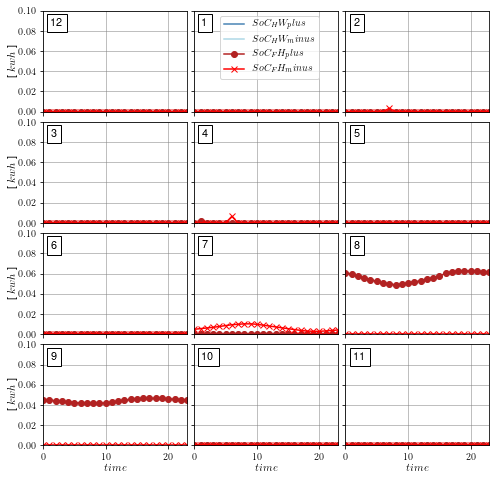

In [115]:
x_axis = np.arange(0,24,1);
fig = pl.subplots(figsize=(8,8));
pl.subplots_adjust(hspace=0.1, wspace=0.05);

# Plots very first upper left
pl.subplot(4,3,1)

pl.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['V_HW_plus'][:], label='$SoC_HW_plus$', color="steelblue");

pl.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['V_HW_minus'][:], label='$SoC_HW_minus$', color="lightblue");

pl.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['T_FH_plus'][:], label='$SoC_FH_plus$', color="firebrick", marker='o');

pl.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['T_FH_minus'][:], label='$SoC_FH_minus$', color="red", marker='x');

pl.annotate("12",xy=(1.3,0.085), fontsize=11, bbox={'facecolor':'white'});
#pl.title('PV flows and battery load by month', fontsize=13, x=1.6);
pl.ylim(0, 0.1); 
pl.xlim(0, 23);
pl.ylabel('[ $kwh$ ]', fontsize=11, labelpad=1);
ax=pl.gca();
ax.axes.xaxis.set_ticklabels([]);
ax.grid(color='grey', linestyle='-', linewidth=0.5);

# Plots others in loop
for i in np.arange(2,13):
    pl.subplot(4,3,i)

    pl.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['V_HW_plus'][:], label='$SoC_HW_plus$', color="steelblue");

    pl.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['V_HW_minus'][:], label='$SoC_HW_minus$', color="lightblue");

    pl.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['T_FH_plus'][:], label='$SoC_FH_plus$', color="firebrick", marker='o');

    pl.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['T_FH_minus'][:], label='$SoC_FH_minus$', color="red", marker='x');

    pl.annotate(i-1,xy=(1.3,0.085), fontsize=11, bbox={'facecolor':'white'});
    pl.ylim(0, 0.1);  
    pl.xlim(0, 23);
    pl.ylabel('[ $kwh$ ]', fontsize=11, labelpad=1);
    pl.xlabel('$time$', fontsize=11, labelpad=1);
    ax=pl.gca();
    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    if not i in [1,4,7,10]:
        ax.axes.yaxis.set_ticklabels([]);
        pl.ylabel(None);
        
    if not i in np.arange(10,13):
        ax.axes.xaxis.set_ticklabels([]);
        pl.xlabel(None);
    
    if i == 2:
        ax.legend(bbox_to_anchor=(0.9, 1));
#pl.savefig('../latex/pics/Comfort_violations.svg', bbox_inches='tight');
#pl.savefig('../latex/pics/Comfort_violations.pgf', bbox_inches='tight');